In [13]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [14]:
X_data, y_data = load_breast_cancer(return_X_y=True, as_frame=True)

In [15]:
X_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [17]:
X_data = torch.from_numpy(np.array(X_data, dtype=np.float32))
y_data = torch.from_numpy(np.array(y_data.T, dtype=np.float32).reshape((len(y_data), 1)))

In [18]:
#------------------------------------------------------#
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(30, 8) # 输入维度是 10，输出维度是 8
        self.linear2 = torch.nn.Linear(8, 6) 
        self.linear3 = torch.nn.Linear(6, 4) 
        self.linear4 = torch.nn.Linear(4, 1) 
        self.sigmoid = torch.nn.Sigmoid() # 激活函数，添加非线性变换，是一个模块，作为一个层
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        x = self.sigmoid(self.linear4(x))
        return x

model = LogisticRegressionModel()
#-------------------------------------------------------# 
# 二分类的交叉熵，对每个批量求均值，求均值和不求均值会影响学习率
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/home/fl/miniconda3/envs/DTox/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [19]:
#-------------------------------------------------------#
epoch_list = []
loss_list = []
for epoch in range(1000):
    y_pred = model(X_data)
    loss = criterion(y_pred, y_data)
    print("epoch=", epoch, "loss", loss.item())
    loss_list.append(loss.item())
    epoch_list.append(epoch)
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    
    # Update
    optimizer.step()

epoch= 0 loss 0.668789803981781
epoch= 1 loss 0.6687089204788208
epoch= 2 loss 0.6686288714408875
epoch= 3 loss 0.6685497164726257
epoch= 4 loss 0.6684711575508118
epoch= 5 loss 0.6683935523033142
epoch= 6 loss 0.6683163642883301
epoch= 7 loss 0.6682403087615967
epoch= 8 loss 0.6681646108627319
epoch= 9 loss 0.6680899262428284
epoch= 10 loss 0.6680160760879517
epoch= 11 loss 0.6679423451423645
epoch= 12 loss 0.6678698658943176
epoch= 13 loss 0.6677976846694946
epoch= 14 loss 0.6677266359329224
epoch= 15 loss 0.6676559448242188
epoch= 16 loss 0.6675862073898315
epoch= 17 loss 0.6675167679786682
epoch= 18 loss 0.667448103427887
epoch= 19 loss 0.6673802137374878
epoch= 20 loss 0.6673130393028259
epoch= 21 loss 0.6672464609146118
epoch= 22 loss 0.6671804189682007
epoch= 23 loss 0.6671149730682373
epoch= 24 loss 0.667050302028656
epoch= 25 loss 0.6669862270355225
epoch= 26 loss 0.6669227480888367
epoch= 27 loss 0.6668598055839539
epoch= 28 loss 0.6667975783348083
epoch= 29 loss 0.6667357087

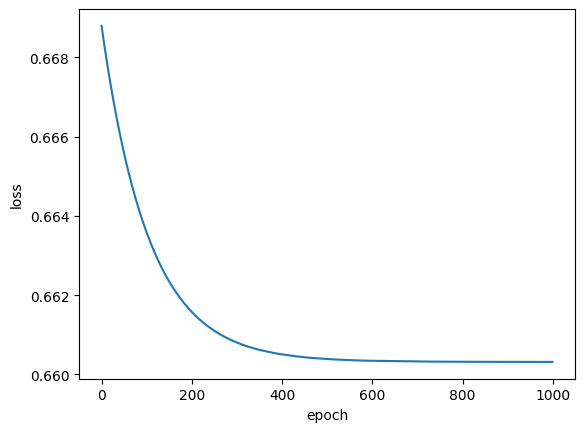

In [20]:
import matplotlib.pyplot as plt


# 绘制曲线图
plt.plot(epoch_list, loss_list)

# 添加标题和标签
plt.xlabel('epoch')
plt.ylabel('loss')

# 显示图形
plt.show()
